# Machine Vision Lab 1
## MohammadParsa Dini
## 400101204

## part 1

Now, we proceed to the experiment. You are provided with a dataset that includes several subsets from the Kanade-Cohn database. Use a loop and OpenCV library functions to read the data from the neutral set. Note that the images are in BGR format, but you need to store them as gray. If needed, you can use the imshow command or the Matplotlib library to display the image. Each image is a 2D matrix. Use the reshape command to convert each image into a 1D vector and consider it as a sample facial image. This set contains images of about 96 people, with a maximum of two images per person. Use images of 70 individuals for training and forming the facespace, and use the remaining images for testing.

Here, we read and store the images and plot some random samples from the dataset of neutral images.
Firstly, we show and plot the original images, then we plot their scale images.

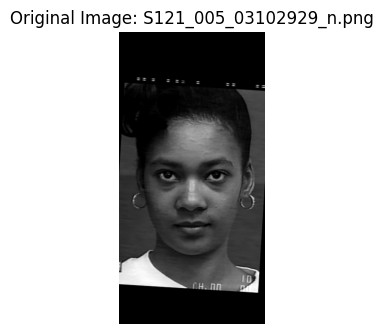

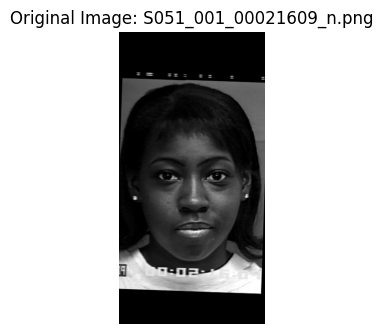

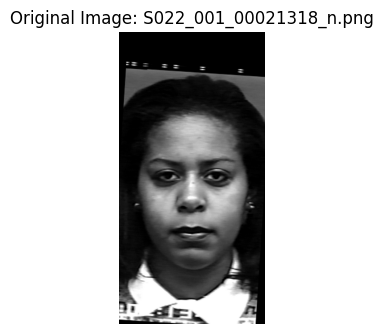

In [2]:
import os
import cv2 
import random
import numpy as np
import matplotlib.pyplot as plt

random.seed(42)
# dataset_path_neutral = '/home/parsa/Downloads/Cohn-Kanade/images/neutral'
dataset_path_neutral = 'C:/Users/USER/Downloads/Cohn-Kanade/images/neutral'
image_files_neutral = os.listdir(dataset_path_neutral)
sample_images_neutral = random.sample(image_files_neutral, 3)
original_images_neutral = []
gray_images_neutral = []
gray_vectors_neutral = []
labels = []

for folder_name in image_files_neutral:
    image_path = os.path.join(dataset_path_neutral, folder_name)
    img_bgr_neutral = cv2.imread(image_path)
    original_images_neutral.append(img_bgr_neutral)
    img_gray_neutral = cv2.cvtColor(img_bgr_neutral, cv2.COLOR_BGR2GRAY)
    gray_images_neutral.append(img_gray_neutral)
    img_vector_neutral = img_gray_neutral.reshape(-1)  
    gray_vectors_neutral.append(img_vector_neutral)
    labels.append(folder_name)
i = 1
for image_file_neutral in sample_images_neutral:

    index_neutral = image_files_neutral.index(image_file_neutral)
    plt.subplot(1,3, i)
    i += 1
    plt.imshow(cv2.cvtColor(original_images_neutral[index_neutral], cv2.COLOR_BGR2RGB))
    plt.title(f"Original Image: {image_file_neutral}")
    plt.axis('off')  
    plt.show()
    
    


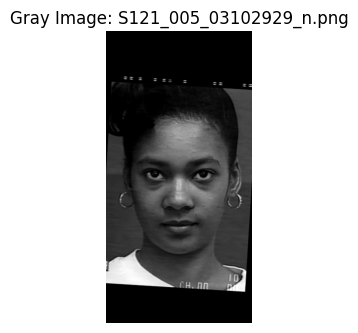

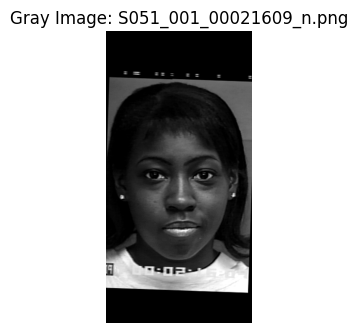

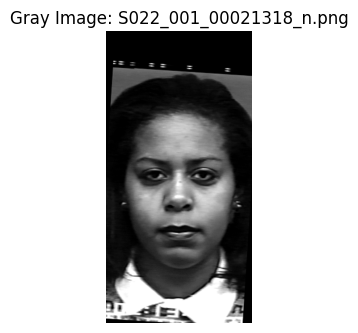

In [3]:
i = 1
for image_file_neutral in sample_images_neutral:
    index_neutral = image_files_neutral.index(image_file_neutral)
    plt.subplot(1,3,i)
    plt.imshow(gray_images_neutral[index_neutral], cmap='gray')
    plt.title(f"Gray Image: {image_file_neutral}")
    plt.axis('off')
    i += 1
    plt.show()

Now we vectorize( flatten) images in neitral dataset. Firthermore, we will devide them into a test and a train dataset.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Assuming gray_images_neutral is already defined
gray_images_neutral_flatten = [img.flatten() for img in gray_images_neutral]

# Assuming labels is already defined
X_train, X_test, y_train, y_test = train_test_split(gray_images_neutral_flatten, labels, test_size=0.63, random_state=42)
print(f'Number of training samples: {len(X_train)}')
print(f'Number of testing samples: {len(X_test)}')

Number of training samples: 70
Number of testing samples: 120


Now in this step, we will perform the PCA under the train data fro neutral images and then show the most important Eigenfaces. The ones with the largest eigenvalues. It is obvious that the more data we use at training, the better the results.

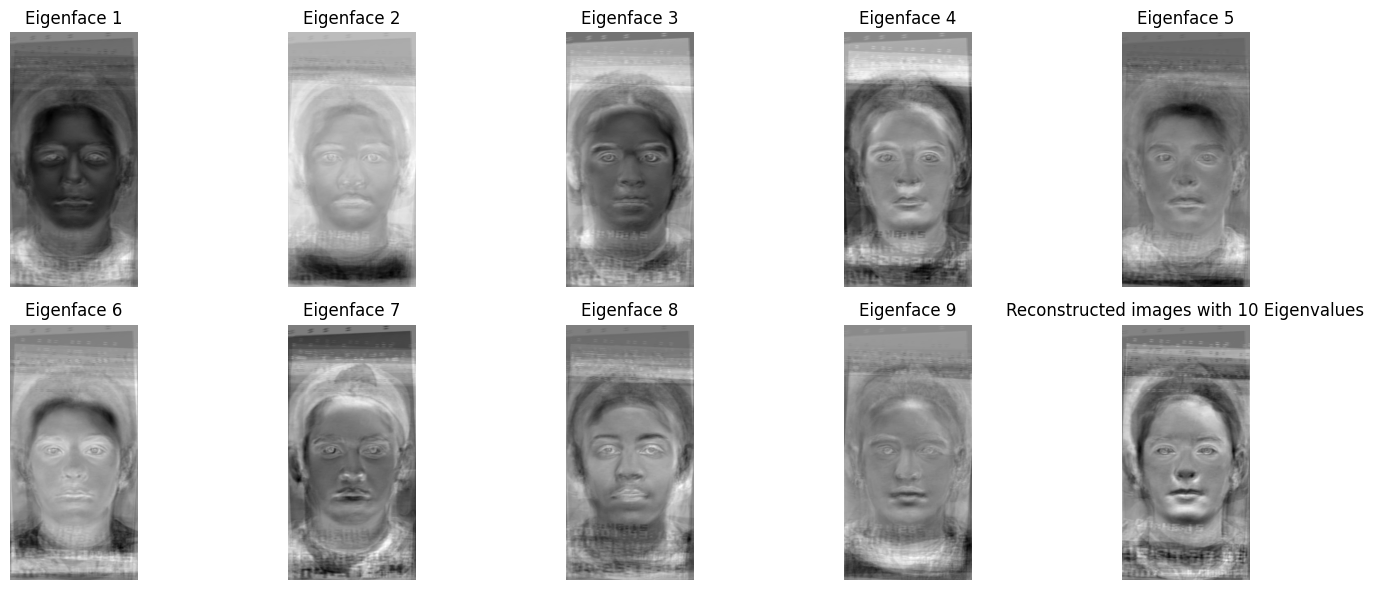

In [6]:
image_height, image_width = 600, 300
pca_10eigen = PCA(n_components=10)
pca_10eigen.fit(X_train)

top_eigenfaces10 = pca_10eigen.components_

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i in range(10):
    eigenface10 = top_eigenfaces10[i].reshape((image_height, image_width))
    ax = axes[i // 5, i % 5]
    ax.imshow(eigenface10, cmap='gray')
    ax.set_title(f'Eigenface {i+1}')
    ax.axis('off')

plt.title('Reconstructed images with 10 Eigenvalues')
plt.tight_layout()
plt.show()


Note that it came to my attention that here normilizing data was not as good as performing PCA without any normilization.

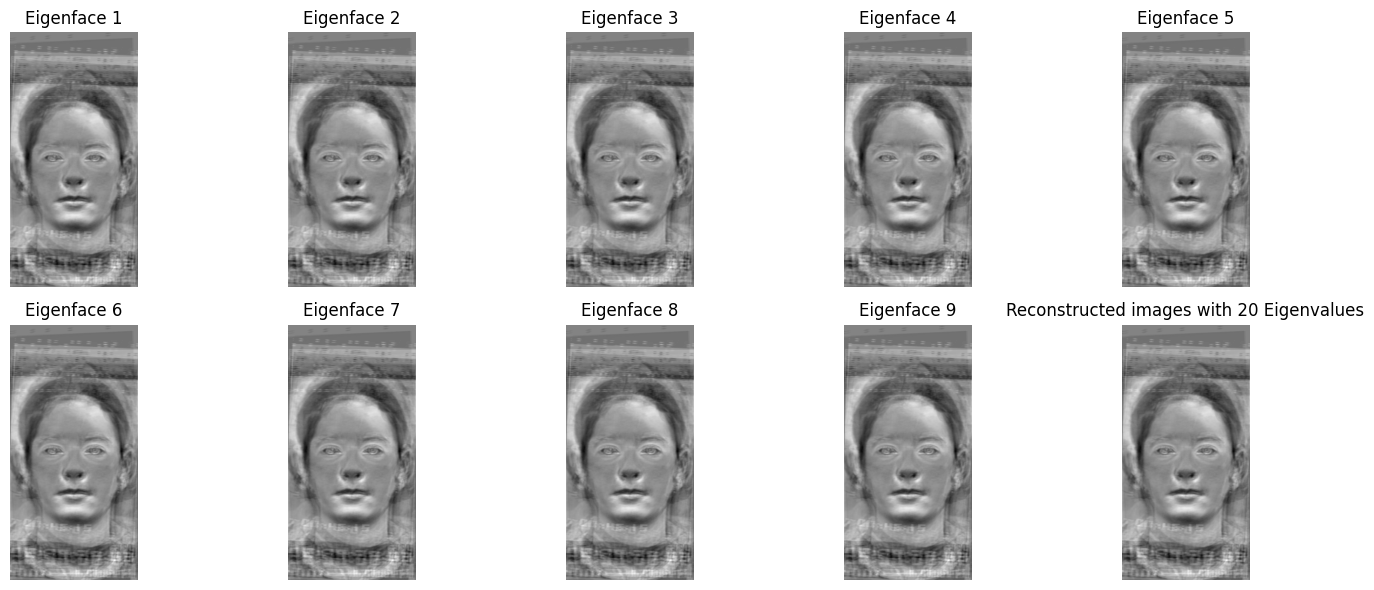

In [7]:
image_height, image_width = 600, 300
pca_20eigen = PCA(n_components=20)
pca_20eigen.fit(X_train)

top_eigenfaces20 = pca_20eigen.components_

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i in range(10):
    eigenface20 = top_eigenfaces20[i].reshape((image_height, image_width))
    ax = axes[i // 5, i % 5]
    ax.imshow(eigenface10, cmap='gray')
    ax.set_title(f'Eigenface {i+1}')
    ax.axis('off')
    
plt.title('Reconstructed images with 20 Eigenvalues')
plt.tight_layout()
plt.show()


Clearly, the more eigenvalue components used in training, the more the reconstructed images resemble the real ones. As you can see, the images reconstructed with 20 eigenvalues are closer to the real images and are less blurred than those reconstructed with 10 components.

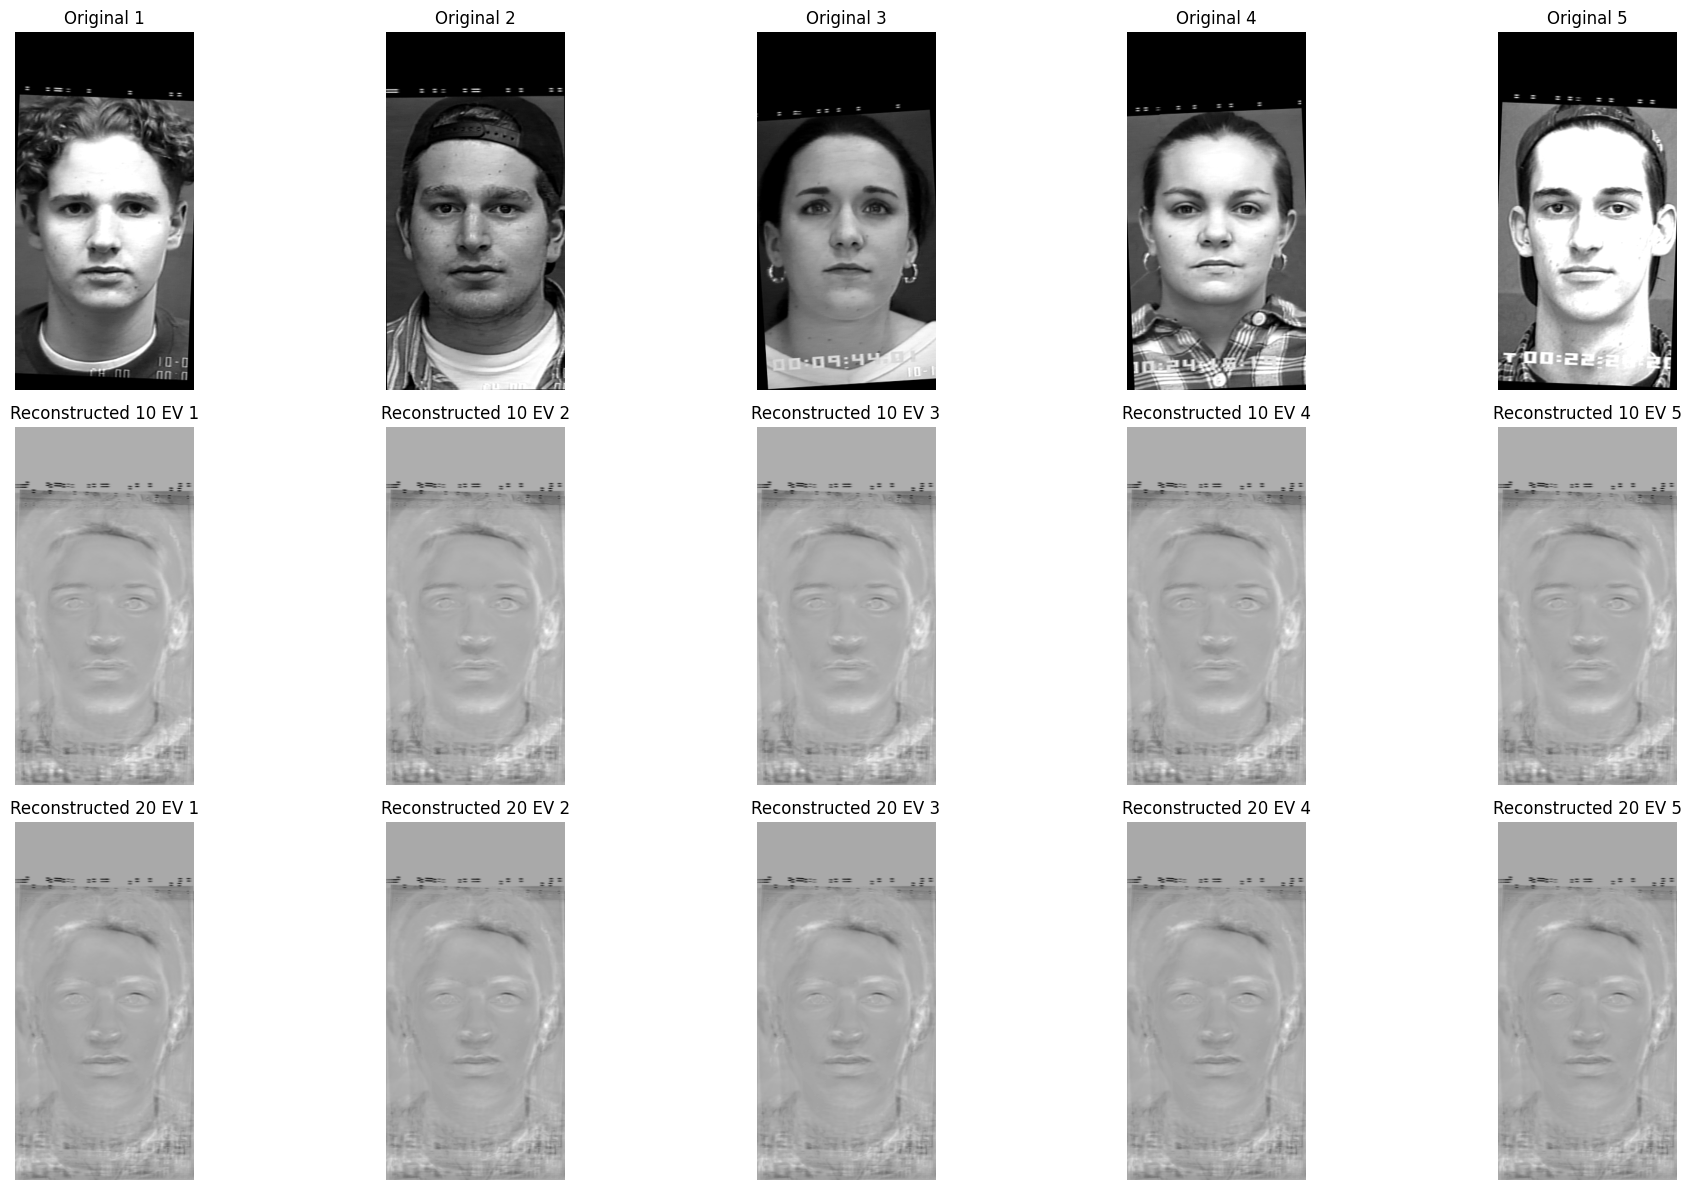

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def project_and_reconstruct(images, pca, mean_face, eps):
    centered_data = images - mean_face
    std_dev = centered_data.std(axis=0)
    normalized_data = centered_data / (std_dev + eps)
    projections = np.dot(normalized_data, pca.components_.T)
    reconstructions = mean_face + np.dot(projections, pca.components_) * std_dev
    
    return reconstructions

mean_face = np.mean(X_train, axis=0)

pca_10eigen = PCA(n_components=10)
pca_10eigen.fit(X_train)
top_10_eigenfaces = pca_10eigen.components_

pca_20eigen = PCA(n_components=20)
pca_20eigen.fit(X_train)
top_20_eigenfaces = pca_20eigen.components_

indices = [0, 1, 2, 3, 4]  # Selecting 5 images from the test data
X_test = np.array(X_test) 
selected_test_images = X_test[indices]

# Reconstruct images using top 10 and top 20 eigenvectors
reconstructed_10 = project_and_reconstruct(selected_test_images, pca_10eigen, mean_face, 0.0001)
reconstructed_20 = project_and_reconstruct(selected_test_images, pca_20eigen, mean_face, 0.0001)

fig, axes = plt.subplots(3, 5, figsize=(20, 12))
for i, img in enumerate(selected_test_images):
    original_img = img.reshape(image_height, image_width)
    axes[0, i].imshow(original_img, cmap='gray')
    axes[0, i].set_title(f'Original {i+1}')
    axes[0, i].axis('off')

for i, img in enumerate(reconstructed_10):
    reconstructed_img = img.reshape(image_height, image_width)
    axes[1, i].imshow(reconstructed_img, cmap='gray')
    axes[1, i].set_title(f'Reconstructed 10 EV {i+1}')
    axes[1, i].axis('off')

for i, img in enumerate(reconstructed_20):
    reconstructed_img = img.reshape(image_height, image_width)
    axes[2, i].imshow(reconstructed_img, cmap='gray')
    axes[2, i].set_title(f'Reconstructed 20 EV {i+1}')
    axes[2, i].axis('off')

plt.tight_layout()
plt.show()


Although the test data was never used in training the PCA model, it still manages to project the images onto a recognizable face to some extent. However, as seen above, some images are almost identical to the original ones. It is evident that using more components results in greater resemblance and less blurring.
Furthermore, we can see that since there were more women images among the train data, even images of men will tend to be a women image. Moreover, in this context in `project_and_reconstruct(.)` function , we normilizedd the data in contrast to other parts.


## part 2

Firstly, we need to apply the mask to the images in order to focus on face and nothig else. 

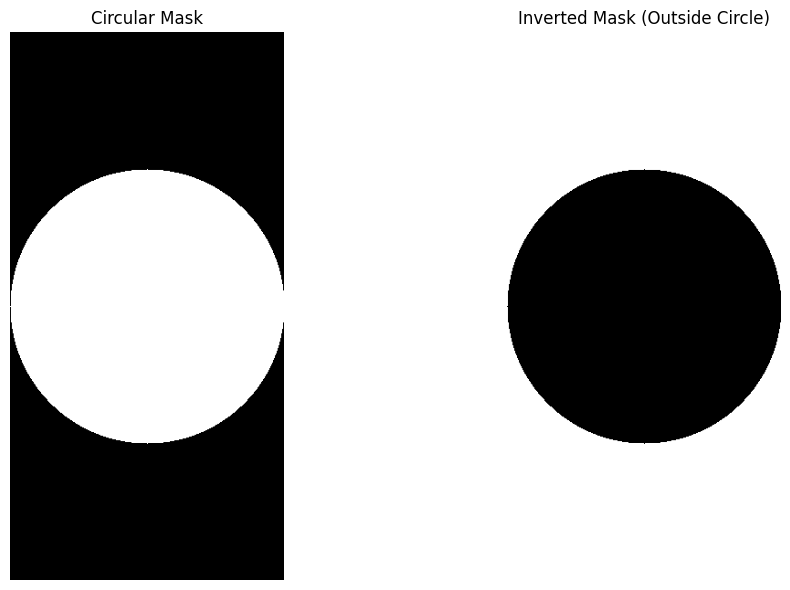

In [14]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

height, width = 600, 300
radius = min(height, width) // 2  
mask = np.zeros((height, width), dtype=np.uint8)
center = (width // 2, height // 2)
cv2.circle(mask, center, radius, 255, -1)  
mask_inv = cv2.bitwise_not(mask)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(mask, cmap='gray')
axes[0].set_title('Circular Mask')
axes[0].axis('off')

axes[1].imshow(mask_inv, cmap='gray')
axes[1].set_title('Inverted Mask (Outside Circle)')
axes[1].axis('off')

plt.tight_layout()
plt.show()

In [1]:
import os
import cv2
import numpy as np
import matplotlib
# Define the path to the dataset
dataset_path = 'C:/Users/USER/Downloads/Cohn-Kanade/images/neutral'

# Initialize an empty list to store the images
gray_images = []

# Loop through the dataset directory
for folder_name in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder_name)
    if os.path.isdir(folder_path):
        for file_name in os.listdir(folder_path):
            if file_name.endswith('.jpg') or file_name.endswith('.png'):  # Adjust the file types as necessary
                file_path = os.path.join(folder_path, file_name)
                # Read the image in BGR format
                img = cv2.imread(file_path)
                # Convert the image to grayscale
                gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                # Append the grayscale image to the list
                gray_images.append(gray_img)

# Example to display one of the images (optional)
i = 10
cv2.imshow('Gray Image', gray_images[i])
cv2.waitKey(0)
cv2.destroyAllWindows()
print(len(gray_images))


410


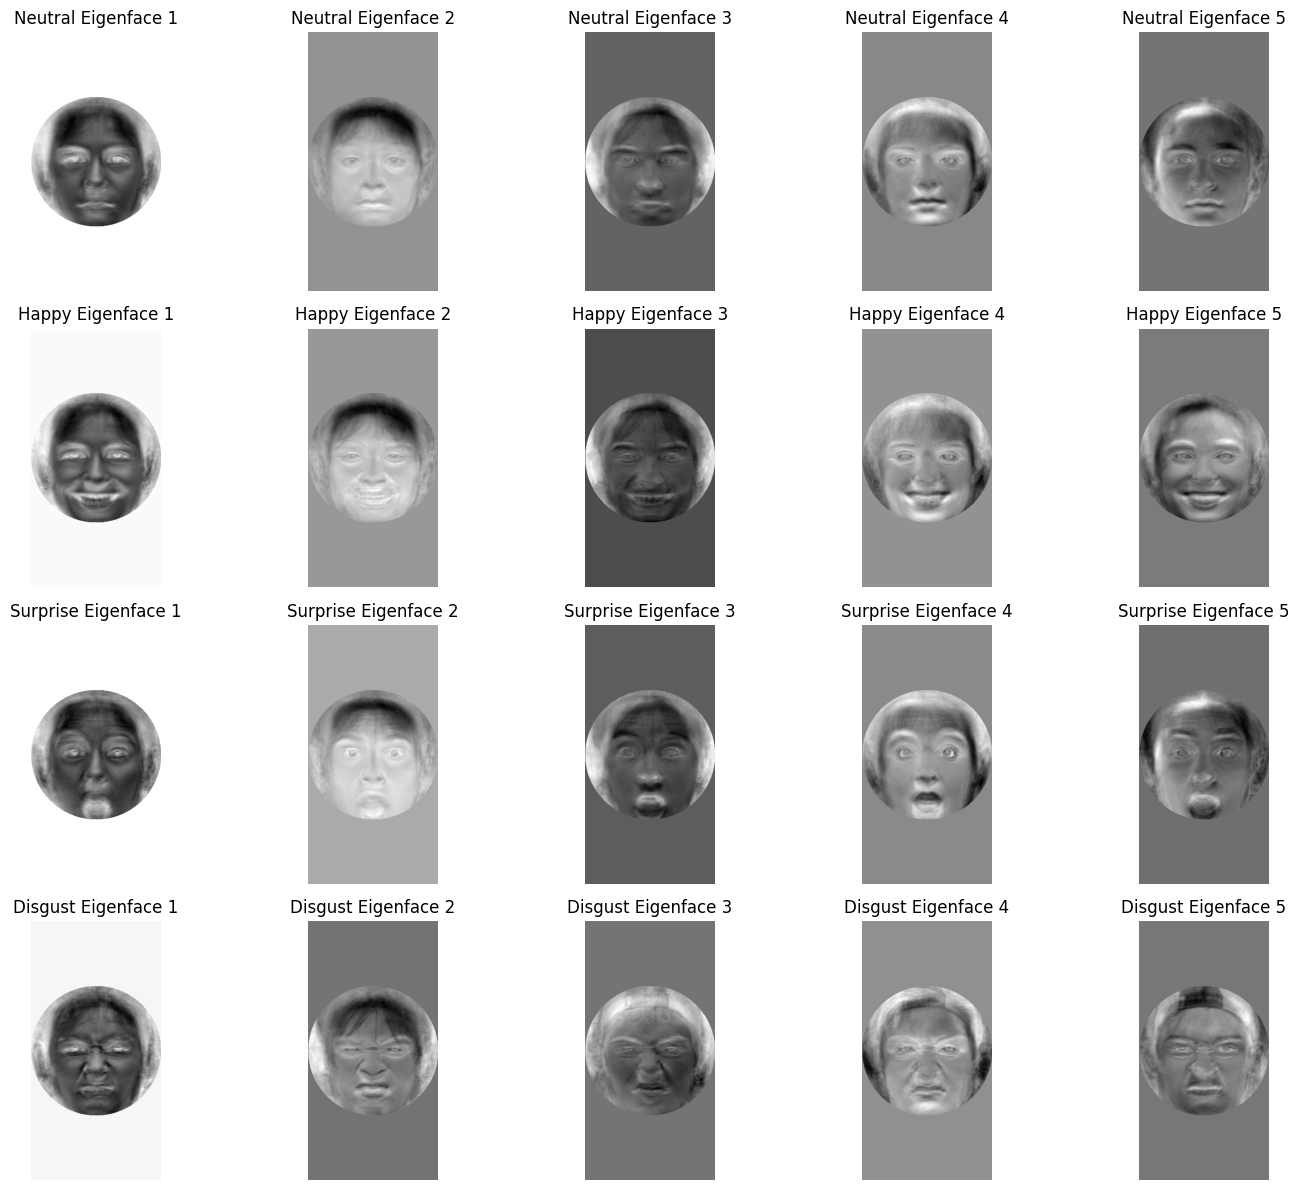

In [20]:
import cv2
import numpy as np
import os
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

dataset_path = 'C:/Users/USER/Downloads/Cohn-Kanade/images'
height, width = 600, 300
radius = min(height, width) // 2
mask = np.zeros((height, width), dtype=np.uint8)
center = (width // 2, height // 2)
cv2.circle(mask, center, radius, 255, -1)

# Finds the images, reads them, then grayscales them, finally puts a mask on them
emotion_images = {'neutral': [], 'happy': [], 'surprise': [], 'disgust': []}
for folder_name in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder_name)
    if os.path.isdir(folder_path):
        emotion = folder_name
        if emotion in emotion_images:
            for file_name in os.listdir(folder_path):
                if file_name.endswith('.jpg') or file_name.endswith('.png'):
                    file_path = os.path.join(folder_path, file_name)
                    img = cv2.imread(file_path)
                    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                    masked_img = cv2.bitwise_and(gray_img, mask)
                    emotion_images[emotion].append(masked_img.flatten())

pca_models = {}
for emotion, images in emotion_images.items():
    images = np.array(images)
    mean_face = np.mean(images, axis=0)
    centered_data = images - mean_face
    pca = PCA(n_components=20)
    pca.fit(centered_data)
    pca_models[emotion] = pca

# Display top eigenfaces for each emotion and apply the mask
fig, axes = plt.subplots(len(emotion_images), 5, figsize=(15, 12))
for row, (emotion, pca) in enumerate(pca_models.items()):
    eigenfaces = pca.components_[:5]
    for col in range(5):
        eigenface = eigenfaces[col].reshape((height, width))
        
        # Normalize for better visualization
        eigenface = (eigenface - np.min(eigenface)) / (np.max(eigenface) - np.min(eigenface))
        
        ax = axes[row, col]
        ax.imshow(eigenface, cmap='gray')
        ax.set_title(f'{emotion.capitalize()} Eigenface {col+1}')
        ax.axis('off')

plt.tight_layout()
plt.show()


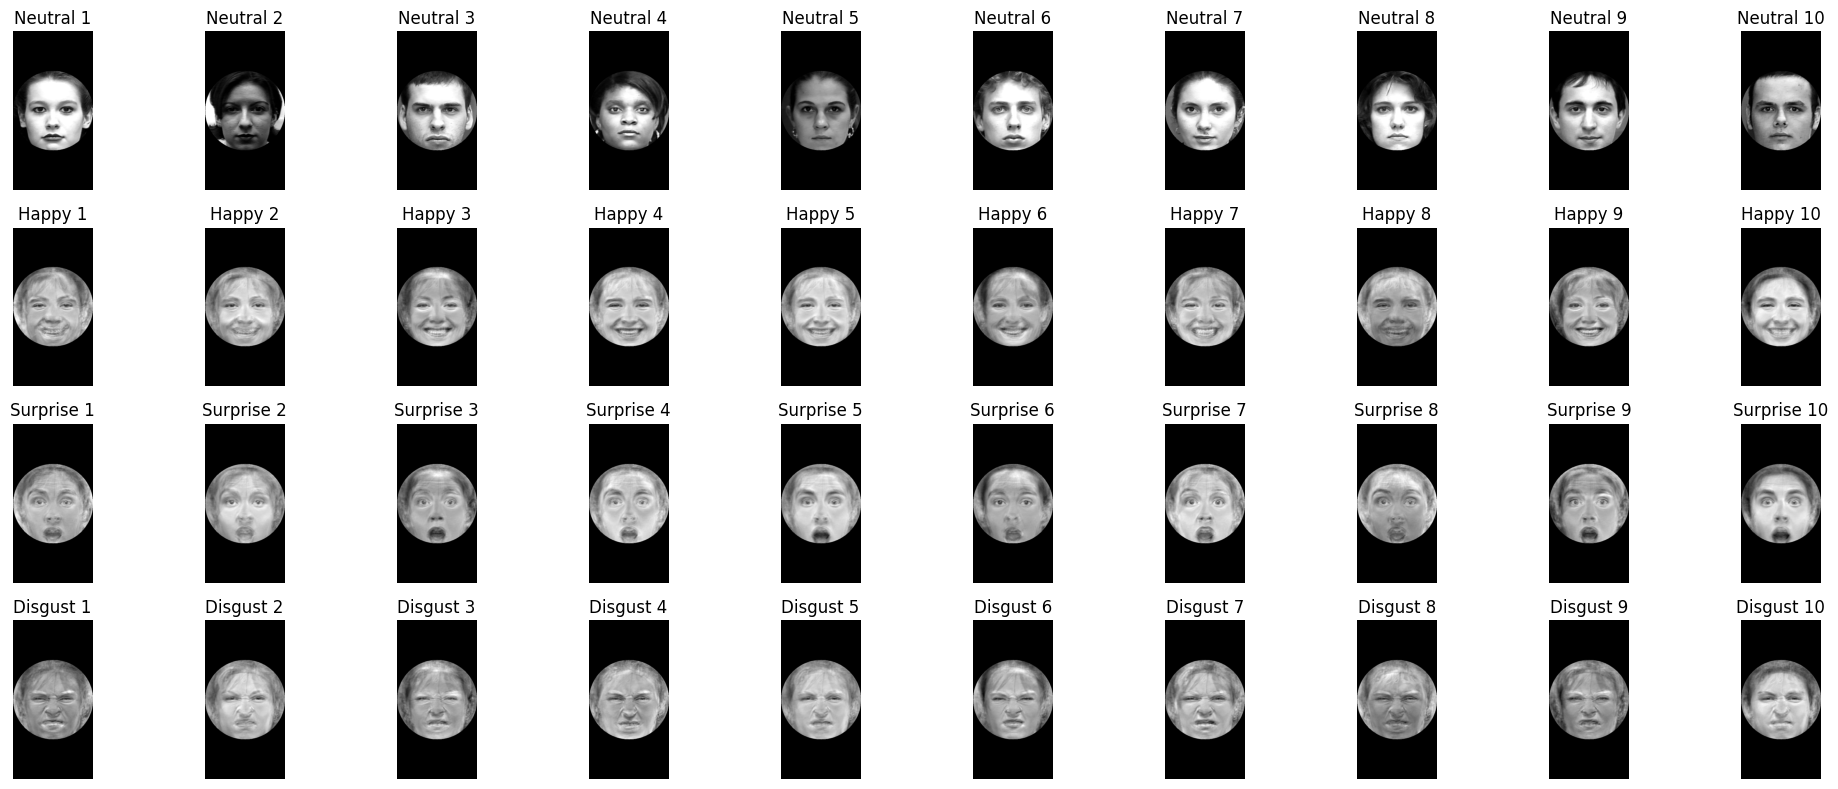

In [25]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def project_and_reconstruct(images, pca, mean_face, eps):
    centered_data = images - mean_face
    std_dev = centered_data.std(axis=0)
    normalized_data = centered_data / (std_dev + eps)
    projections = np.dot(normalized_data, pca.components_.T)
    reconstructions = mean_face + np.dot(projections, pca.components_) * std_dev
    return reconstructions

def apply_mask(images, mask):
    masked_images = []
    for img in images:
        img = img.reshape(mask.shape)  
        masked_img = cv2.bitwise_and(img.astype(np.uint8), mask)
        masked_images.append(masked_img.flatten())
    return np.array(masked_images)

height, width = 600, 300
mask = np.zeros((height, width), dtype=np.uint8)
center = (width // 2, height // 2)
radius = min(height, width) // 2
cv2.circle(mask, center, radius, 255, -1)

for key in emotion_images:
    emotion_images[key] = np.array(emotion_images[key])

neutral_images = emotion_images['neutral']
neutral_images_masked = apply_mask(neutral_images, mask)
random_indices = random.sample(range(len(neutral_images_masked)), 10)
random_neutral_images = neutral_images_masked[random_indices]
emotion_list = ['happy', 'surprise', 'disgust']
reconstructions = {emotion: [] for emotion in emotion_list}

for emotion in emotion_list:
    pca = pca_models[emotion]
    mean_face = np.mean(emotion_images[emotion], axis=0).reshape(mask.shape)
    mean_face_masked = cv2.bitwise_and(mean_face.astype(np.uint8), mask).flatten()
    for img_vector in random_neutral_images:
        img_reconstruction = project_and_reconstruct(img_vector, pca, mean_face_masked, 0.0001)
        reconstructions[emotion].append(img_reconstruction)

fig, axes = plt.subplots(4, 10, figsize=(20, 8))
for i, img_vector in enumerate(random_neutral_images):
    original_img = img_vector.reshape(mask.shape[0], mask.shape[1])
    axes[0, i].imshow(original_img, cmap='gray')
    axes[0, i].set_title(f'Neutral {i+1}')
    axes[0, i].axis('off')

for row, emotion in enumerate(emotion_list, start=1):
    for col, img_vector in enumerate(reconstructions[emotion]):
        reconstructed_img = img_vector.reshape(mask.shape[0], mask.shape[1])
        axes[row, col].imshow(reconstructed_img, cmap='gray')
        axes[row, col].set_title(f'{emotion.capitalize()} {col+1}')
        axes[row, col].axis('off')

plt.tight_layout()
plt.show()


Here, we selected 10 random images from the neutral dataset and projected them into the subspace of EigenFaces for reconstruction. The results show that when a neutral image is projected into the EigenFaces subspace of other emotions, the neutral expression transforms into that particular emotion. This indicates that privacy is not preserved, as having an image of a person allows us to alter their perceived emotion using the aforementioned technique.

It also seems that the noses and eyes are more accurately represented in the reconstructed images by PCA. These features appear clearer and more distinct.